<a href="https://colab.research.google.com/github/Miles-Honsberger/Cyclistic-Bike-Share/blob/main/Google_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
This project will be an analysis of a year's worth of data from a fictional company called 'Cyclistic' as part of the Google Data Analyst Certificate. This analysis will be conducted in Python and further visualizations will be made through Tableau

#Scenario
"You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations."

#Ask - what needs to be done?
The stakeholders want to convert casual riders into annual members. So we should analyze the data history of both parties to draw insights. From there we should determine what would make a casual member want to convert to annual. Finally, we need to determine a marketing strategy to do so.

#Prepare - guiding questions about the data
The data for this analysis is provided by google for the project in the form of CSV files. The data does not contain any sensitive information and is public. The data used is also the most current available, and the data columns and types are consistent. There are no duplicates but there are thousands of rows with null values

#Process - How do we go about using tools on this data
Both excel and bigquery (free version) are not strong enough to handle computations and queries without crashing, so I've opted to use Python for most of the processing before creating a final comprehensive visualization in Tableau

#Analyze - Tell the story
I will be using Python to create simple visualizations and calculations relevant to our analysis. As mentioned, Tableau will be used once we have a clean and comprehensive dataset

#Share - Get different opinions
Ideally, we would have a real job at a company with peers to lend their opinion on this analysis, but since this is just a practice project we'll have to skip this step

#Act - Put the plan into action
This is when we create a course of action based on the findings in this analysis. Again, since this is not a real company project this step will have to be skipped.



In [4]:
#Load some libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
import re
from matplotlib.dates import DateFormatter
from google.colab import files,drive
drive.mount('/content/drive')


import warnings
warnings.filterwarnings('ignore')

# t-test library package
from scipy.stats import ttest_ind
#check for association words package
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#I am using colab so the necessary datasets will have to be uploaded
upload = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Saving year.csv to year.csv


In [ ]:
#The dates are created bu reading each CSV file:
Jul = pd.read_csv("Jul'22.csv")
Aug = pd.read_csv("Aug'22.csv")
Sep = pd.read_csv("Sept'22.csv")
Oct = pd.read_csv("Oct'22.csv")
Nov = pd.read_csv("Nov'22.csv")
Dec = pd.read_csv("Dec'22.csv")
Jan = pd.read_csv("Jan'23.csv")
Feb = pd.read_csv("Feb'23.csv")
Mar = pd.read_csv("March'23.csv")
Apr = pd.read_csv("April'23.csv")
May = pd.read_csv("May'23.csv")
Jun = pd.read_csv("Jun'23.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Concat all CSVs into one dataframe
year = pd.concat([Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Creating a docscript for a detailed overview of the dataframe
def overview():
  data = year
  print("The first five rows of the dataset are:\n", data.head())
  print("\n")
  print("The Row x Column shape is:\n",data.shape)
  print("\n")
  print("The data types are:\n",data.dtypes)
  print("\n")
  print("The amount of null values in each column are:\n",data.isnull().sum())
  print("\n")
  print("The amount of duplicates in each column are:\n",data.duplicated().sum())
  return data

df = overview()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The first five rows of the dataset are:
             ride_id rideable_type           started_at             ended_at  \
0  954144C2F67B1932  classic_bike  2022-07-05 08:12:47  2022-07-05 08:24:32   
1  292E027607D218B6  classic_bike  2022-07-26 12:53:38  2022-07-26 12:55:31   
2  57765852588AD6E0  classic_bike  2022-07-03 13:58:49  2022-07-03 14:06:32   
3  B5B6BE44314590E6  classic_bike  2022-07-31 17:44:21  2022-07-31 18:42:50   
4  A4C331F2A00E79E0  classic_bike  2022-07-13 19:49:06  2022-07-13 20:15:24   

           start_station_name start_station_id  \
0  Ashland Ave & Blackhawk St            13224   
1  Buckingham Fountain (Temp)            15541   
2  Buckingham Fountain (Temp)            15541   
3  Buckingham Fountain (Temp)            15541   
4      Wabash Ave & Grand Ave     TA1307000117   

                 end_station_name end_station_id  start_lat  start_lng  \
0        Kingsbury St & Kinzie St   KA1503000043  41.907066 -87.667252   
1           Michigan Ave & 8th St  

In [ ]:
#Remove duplicates, remove columns unnecessary for analysis, and remove column with null values that are important
year = year.drop_duplicates()
year = year.drop(columns = ["start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng"])
year = year.dropna(subset = ["started_at", "ended_at"])

In [ ]:
#From the docscript we see that "started_at" and "ended_at" are object types
#Let's change them to datetime formats using Pandas
year["started_at"] = pd.to_datetime(year["started_at"])
year["ended_at"] = pd.to_datetime(year["ended_at"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#Loads CSV from Google Drives
#This CSV has been updated and manipulated by the above code
#and is stored in a Google Drive for ease of future analysis and corrections
df = pd.read_csv('/content/drive/My Drive/Data Analysis/Google Capstone Project/bike_df.csv')

In [ ]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0        int64
ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

In [ ]:
#frustratingly, the datatypes were changed to objects when downloading the CSV, so we change them back
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [ ]:
#We will create a column for the trip duration
df['trip_duration'] = df['ended_at'] - df['started_at']
df['trip_duration'] = ((df['trip_duration'])/timedelta(minutes=1)).round(decimals = 1)
#A column for the day of the week
df['day'] = df['started_at'].dt.day_name()
#a column for the month
df['month'] = df['started_at'].dt.month_name()
df['hour'] = df['started_at'].dt.hour
df = df.rename(columns={'member_casual':'membership'})
df = df[df["rideable_type"].str.contains("docked_bike")==False]

In [13]:
#We will create columns for defining seasons and times of day for Tableau
def season_converter(month):
  seasons = {
      'December':'Winter', 'January':'Winter', 'February':'Winter',
      'March':'Spring', 'April':'Spring', 'May':'Spring',
      'June':'Summer', 'July':'Summer', 'August':'Summer',
      'September':'Fall', 'October':'Fall', 'November':'Fall'
      }
  return seasons.get(month)

In [14]:
seasons_list = []
for month in df['month']:
  season = season_converter(month)
  seasons_list.append(season)

df['season'] = seasons_list

In [17]:
def tod_converter(hour):
  times = {
      0:'Night', 1:'Night', 2:'Night', 3:'Night', 4:'Night', 5:'Night',
      6:'Morning', 7:'Morning', 8:'Morning', 9:'Morning', 10:'Morning', 11:'Morning',
      12: "Noon",
      13:'Afternoon', 14:'Afternoon', 15:'Afternoon', 16:'Afternoon', 17:'Afternoon', 18:'Afternoon', 19:'Afternoon', 20:'Afternoon',
      21:'Night', 22:'Night', 23:'Night'
    }
  return times.get(hour)

In [18]:
times_list = []
for hour in df['hour']:
  tod = tod_converter(hour)
  times_list.append(tod)
df["time_of_day"] = times_list

In [19]:
df.describe

<bound method NDFrame.describe of          Unnamed: 0.1  Unnamed: 0           ride_id  rideable_type  \
0                   0           0  954144C2F67B1932   classic_bike   
1                   1           1  292E027607D218B6   classic_bike   
2                   2           2  57765852588AD6E0   classic_bike   
3                   3           3  B5B6BE44314590E6   classic_bike   
4                   4           4  A4C331F2A00E79E0   classic_bike   
...               ...         ...               ...            ...   
5637904       5779439      719613  D7BBF4BCBB72DA32   classic_bike   
5637905       5779440      719614  9A1685F9A39646CA  electric_bike   
5637906       5779441      719615  CD4CC5A60881C7AF  electric_bike   
5637907       5779442      719616  FF6594685CFE2056  electric_bike   
5637908       5779443      719617  66EF9F3C318208B9   classic_bike   

                  started_at             ended_at membership  trip_duration  \
0        2022-07-05 08:12:47  2022-07-05 08:24

In [ ]:
df.to_csv('bike_df.csv')

In [ ]:
files.download('bike_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Thus ends the processing stage**

We now create some basic visualizations and calculations for our initial insights

Since we are given the months and weekdays, we can break down the analysis by a monthly and weekly basis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='membership', ylabel='count'>

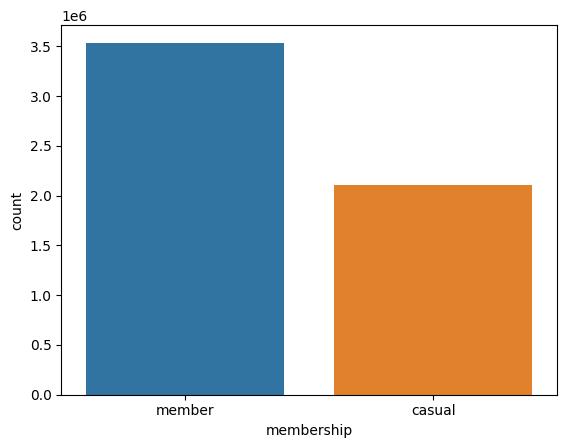

In [ ]:
#Create a countplot of casual members vs annual members
sns.countplot(data = df, x = 'membership')

<Axes: xlabel='membership', ylabel='trip_duration'>

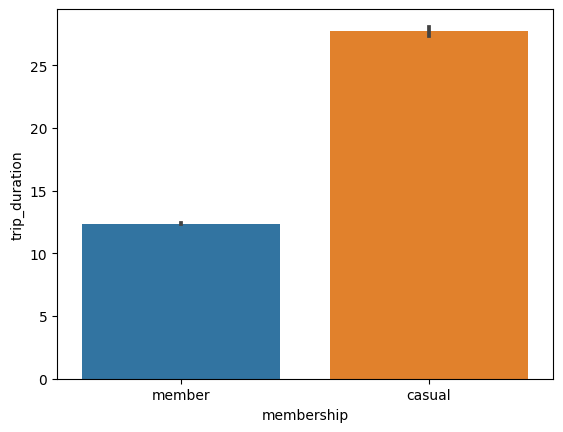

In [ ]:
#Create a visualization for trip durations by membership
sns.barplot(x='membership', y='trip_duration', data = df)

Surprisingly, casual members have a much longer trip duration than annual members.

<Axes: xlabel='rideable_type', ylabel='count'>

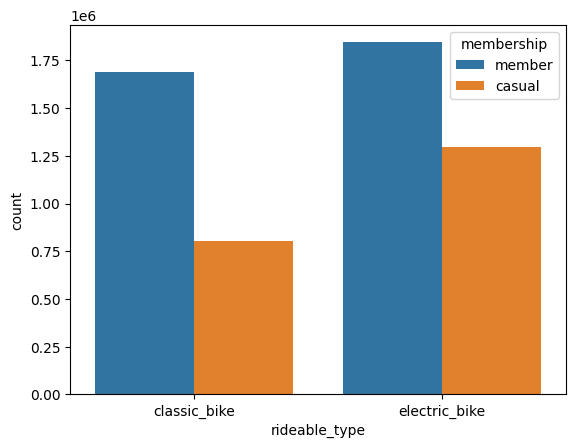

In [ ]:
#We analyze the bike preference by membership type
sns.countplot(data = df, x = 'rideable_type', hue = 'membership')

In [ ]:
#Create a pivot table to analyze the number of riders by the month
pivot_months = (
    pd.pivot_table(
        #group by month and membership
        df, index = ['month', 'membership'], values = 'ride_id',
        #count the number of rides
        aggfunc = {'ride_id':'count'}).reset_index().rename({'ride_id':'count'},axis = 1)
        .replace({
            False: 'casual riders', True: 'members'
        })
    )
pivot_months.head()

,month,membership,count
0,April,casual,147285
1,April,member,279305
2,August,casual,358924
3,August,member,427008
4,December,casual,44894


**We see a much greater number of annual members than casual members, we continue by plotting for a better visualization**

[Text(0.5, 1.0, 'Number of rides by month')]

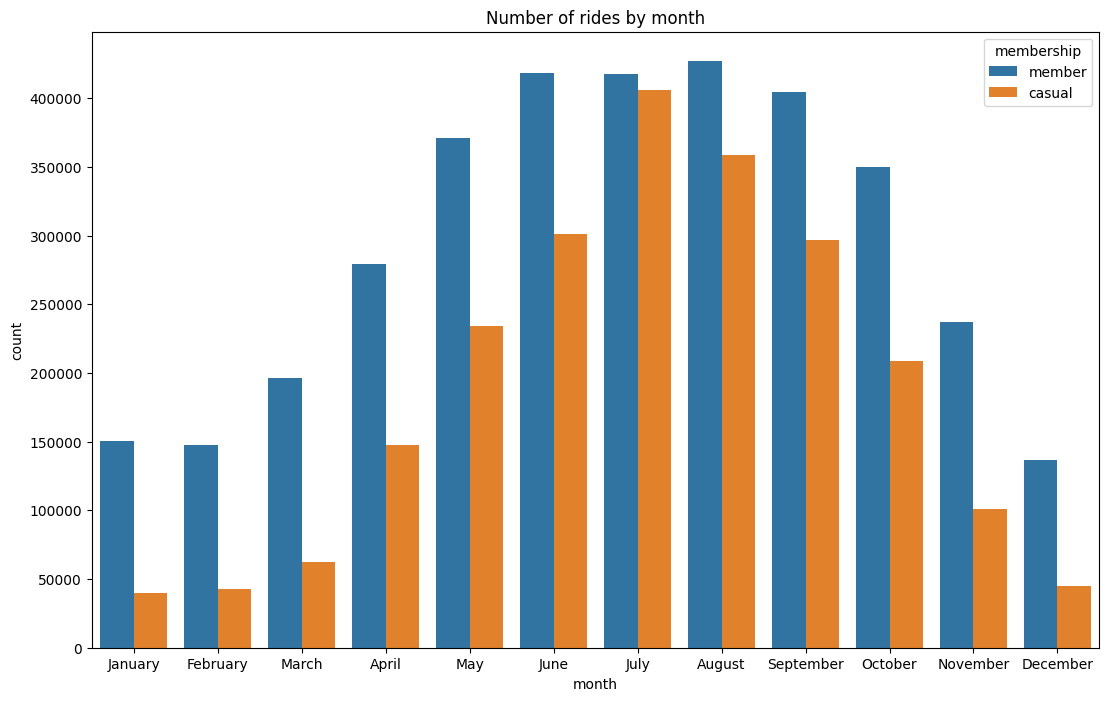

In [ ]:
#Create a plot to visualize the membership differences across the months
#We use the Seaborn barplot
plt.figure(figsize = (13,8))
order_month = ['January','February','March','April','May','June','July','August',
         'September','October','November','December']
sns.countplot(data=df, x = 'month', hue = 'membership', order = order_month).set(title = "Number of rides by month")

We see a bell shaped curve of activity for both membership types. Typically, peaks around the summer time

In [ ]:
#Create a pivot table to analyze the number of riders by the days of the week
pivot_days = (
    pd.pivot_table(
        #group by month and membership
        df, index = ['day', 'membership'], values = 'ride_id',
        #count the number of rides
        aggfunc = {'ride_id':'count'}).reset_index().rename({'ride_id':'count'},axis = 1)
        .replace({
            False: 'casual riders', True: 'members'
        })
    )
pivot_days.head()

,day,membership,count
0,Friday,casual,347112
1,Friday,member,518882
2,Monday,casual,253088
3,Monday,member,477624
4,Saturday,casual,459987


[Text(0.5, 1.0, 'Number of rides by day')]

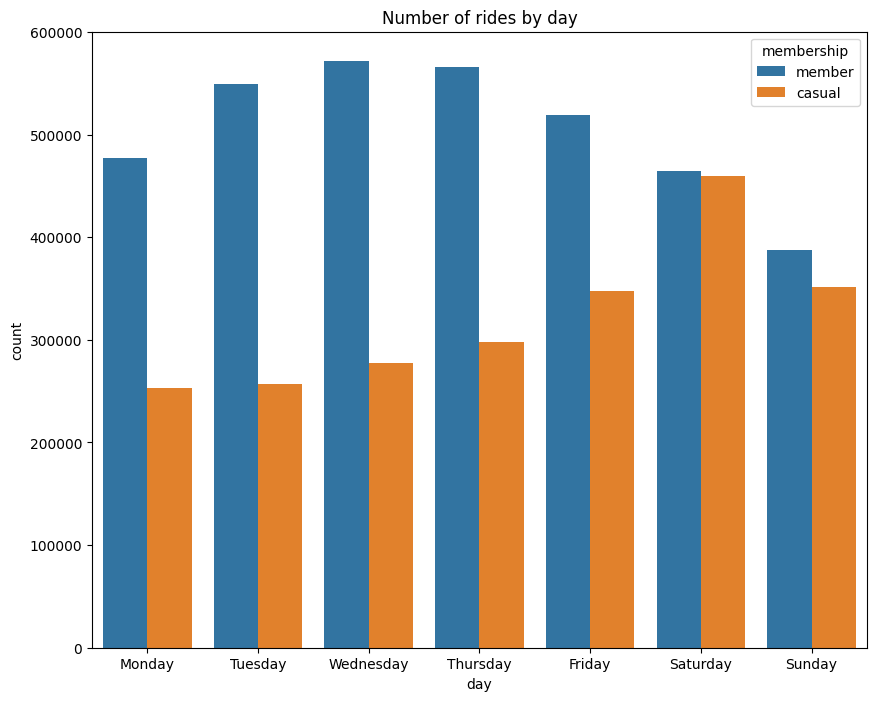

In [ ]:
#Create a plot to visualize the membership differences across the weeks
#We use the Seaborn barplot
plt.figure(figsize=(10,8))
order_day = ['Monday','Tuesday','Wednesday','Thursday','Friday',
             'Saturday','Sunday']
sns.countplot(data=df, x = 'day', hue = 'membership', order = order_day).set(title = "Number of rides by day")

In [ ]:
#Create a pivot table to analyze the number of riders by the days of the week
pivot_hour = (
    pd.pivot_table(
        #group by month and membership
        df, index = ['hour', 'membership'], values = 'ride_id',
        #count the number of rides
        aggfunc = {'ride_id':'count'}).reset_index().rename({'ride_id':'count'},axis = 1)
        .replace({
            False: 'casual riders', True: 'members'
        })
    )
pivot_hour.head()

,hour,membership,count
0,0,casual,43244
1,0,member,36571
2,1,casual,28260
3,1,member,22389
4,2,casual,17279


[Text(0.5, 1.0, 'Number of rides by the hour (military time)')]

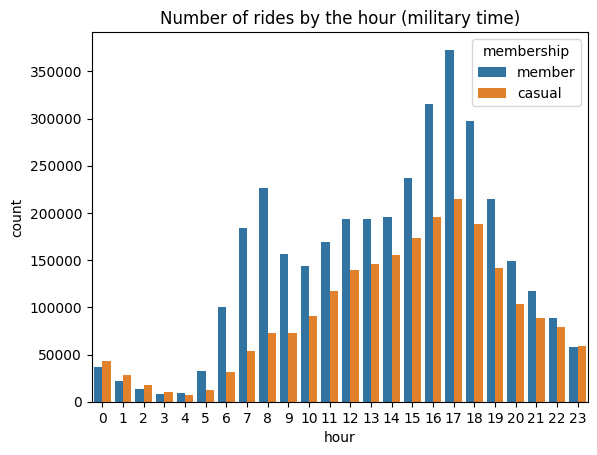

In [ ]:
#Create a plot to visualize the membership differences across the hours of the day
#Military time
#We use the Seaborn barplot
#order_hour
sns.countplot(data=df, x = 'hour', hue = 'membership').set(title = "Number of rides by the hour (military time)")

#Conclusion
**Annual members are much higher populated than casual members**

* There is an overwhelmingly higher number of annual members than casual members

**The trends of ride counts are seasonally consistent for both groups**

* Both membership types show a bell curved trend throughout the year, peaking around summer time

**The trends of ride counts during work hours are consistent for both groups**

* Both membership types show peak ride counts during work hours, notably from 6am

to 9pm

**Weekday ride counts are different for each group**

* Annual members show peak ride times during the work week. Casual members have more rides on weekends.

**Both groups prefer electric bikes over classic bikes**

* More casual members proportionally prefer electric bikes

**Casual members have much longer ride times**

* Casual members have a significantly higher trip duration than annual members

#Insights

It is more likely that annually committed members are using bikes to commute home from work whilst casual members are using the bikes recreationally. Casual members are likely still using bikes to commute as well, based on the trend seen for work hours.

#How do we go about converting casual members to annually committed members?

There are much fewer casual members, who prefer using the bikes on weekends, but we still see activity throughout the whole week akin to annual members. A marketing strategy should take advantage of the long ride times such as:
* offering reduced hourly rates to use the bikes as an annual member
* offering promotions during the summertime, where peak activity is seen